# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [1]:
import os

!git clone https://github.com/Kerbabyk/2024-Kondratenkov-TimeSeriesCourse.git

os.chdir('2024-Kondratenkov-TimeSeriesCourse/practice/06 Chains')

print(os.getcwd())

Cloning into '2024-Kondratenkov-TimeSeriesCourse'...
remote: Enumerating objects: 744, done.
remote: Counting objects: 100% (361/361), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 744 (delta 248), reused 269 (delta 190), pack-reused 383 (from 1)
Receiving objects: 100% (744/744), 220.65 MiB | 18.81 MiB/s, done.
Resolving deltas: 100% (312/312), done.
Updating files: 100% (204/204), done.
/content/2024-Kondratenkov-TimeSeriesCourse/practice/06 Chains


In [2]:
%load_ext autoreload
%autoreload 2

In [22]:
!pip install stumpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 4.4 MB/s eta 0:00:00


## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

In [ ]:
# INSERT YOUR CODE

In [69]:
# Загрузка данных
ts = np.loadtxt('./datasets/Rotation Matrix.txt')

# Параметры
m = 50

# Поиск цепочек
mp = stumpy.stump(ts, m=m)
all_chain_set, unachored_chain = stumpy.allc(mp[:, 2], mp[:, 3])

# Вывод индексов начала звеньев самой длинной цепочки
longest_chain = max(all_chain_set, key=len)
print("Индексы начала звеньев самой длинной цепочки:", longest_chain)

Индексы начала звеньев самой длинной цепочки: [ 16  55 124 490 524 591]


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

In [ ]:
# INSERT YOUR CODE

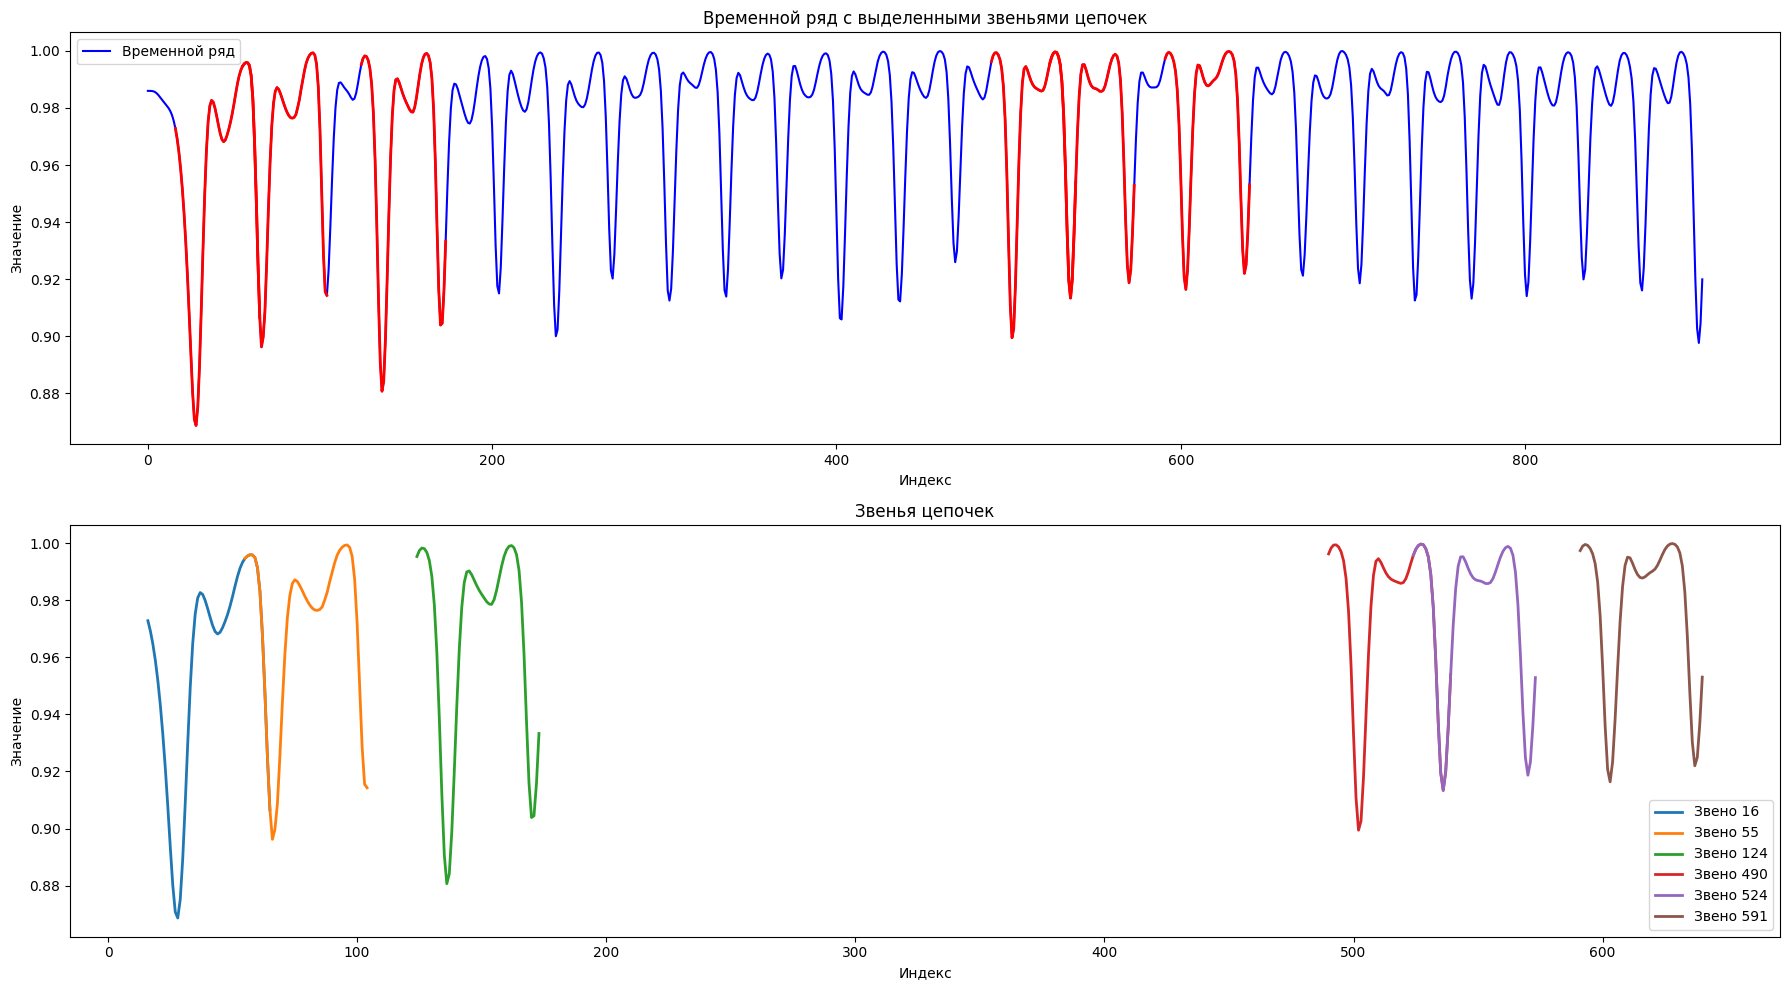

In [71]:
# Визуализация
plt.figure(figsize=(18, 10))

# График временного ряда с выделенными звеньями цепочек
plt.subplot(2, 1, 1)
plt.plot(ts, label='Временной ряд', color='blue')
for idx in longest_chain:
    plt.plot(range(idx, idx + m), ts[idx:idx + m], color='red', linewidth=2)
plt.title('Временной ряд с выделенными звеньями цепочек')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()

# График только звеньев цепочек
plt.subplot(2, 1, 2)
for idx in longest_chain:
    plt.plot(range(idx, idx + m), ts[idx:idx + m], label=f'Звено {idx}', linewidth=2)
plt.title('Звенья цепочек')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()

plt.tight_layout()
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

In [ ]:
# INSERT YOUR CODE

Предсказанное значение последнего звена: [0.99522174 0.99738944 0.99895602 0.99991547 1.0002673  0.99913607
 0.99668826 0.99073145 0.9792202  0.9612528  0.9414469  0.92835486
 0.92730102 0.9371755  0.9526173  0.9683691  0.98127826 0.99015374
 0.99507484 0.99668325 0.99585975 0.99363414 0.99103756 0.98887815
 0.98748378 0.98688902 0.98684418 0.98684675 0.98647606 0.985795
 0.98546738 0.98491176 0.9853225  0.9869062  0.98950553 0.9924577
 0.99513906 0.9971454  0.99821638 0.998324   0.99619485 0.9904697
 0.97906322 0.9622358  0.944077   0.93012046 0.92401272 0.9267246
 0.9370376  0.9518138 ]
Истинное значение последнего звена: [0.9973732  0.9989549  0.999528   0.99919736 0.99811685 0.9962082
 0.99281263 0.9863478  0.9745393  0.9565029  0.9360237  0.92072046
 0.91636205 0.92332923 0.9381913  0.9559411  0.9723799  0.984745
 0.9921676  0.9950788  0.99482465 0.992954   0.9907528  0.9889923
 0.987978   0.9877495  0.9881759  0.98892975 0.9896201  0.99015117
 0.99087685 0.9921806  0.99402213 0.9

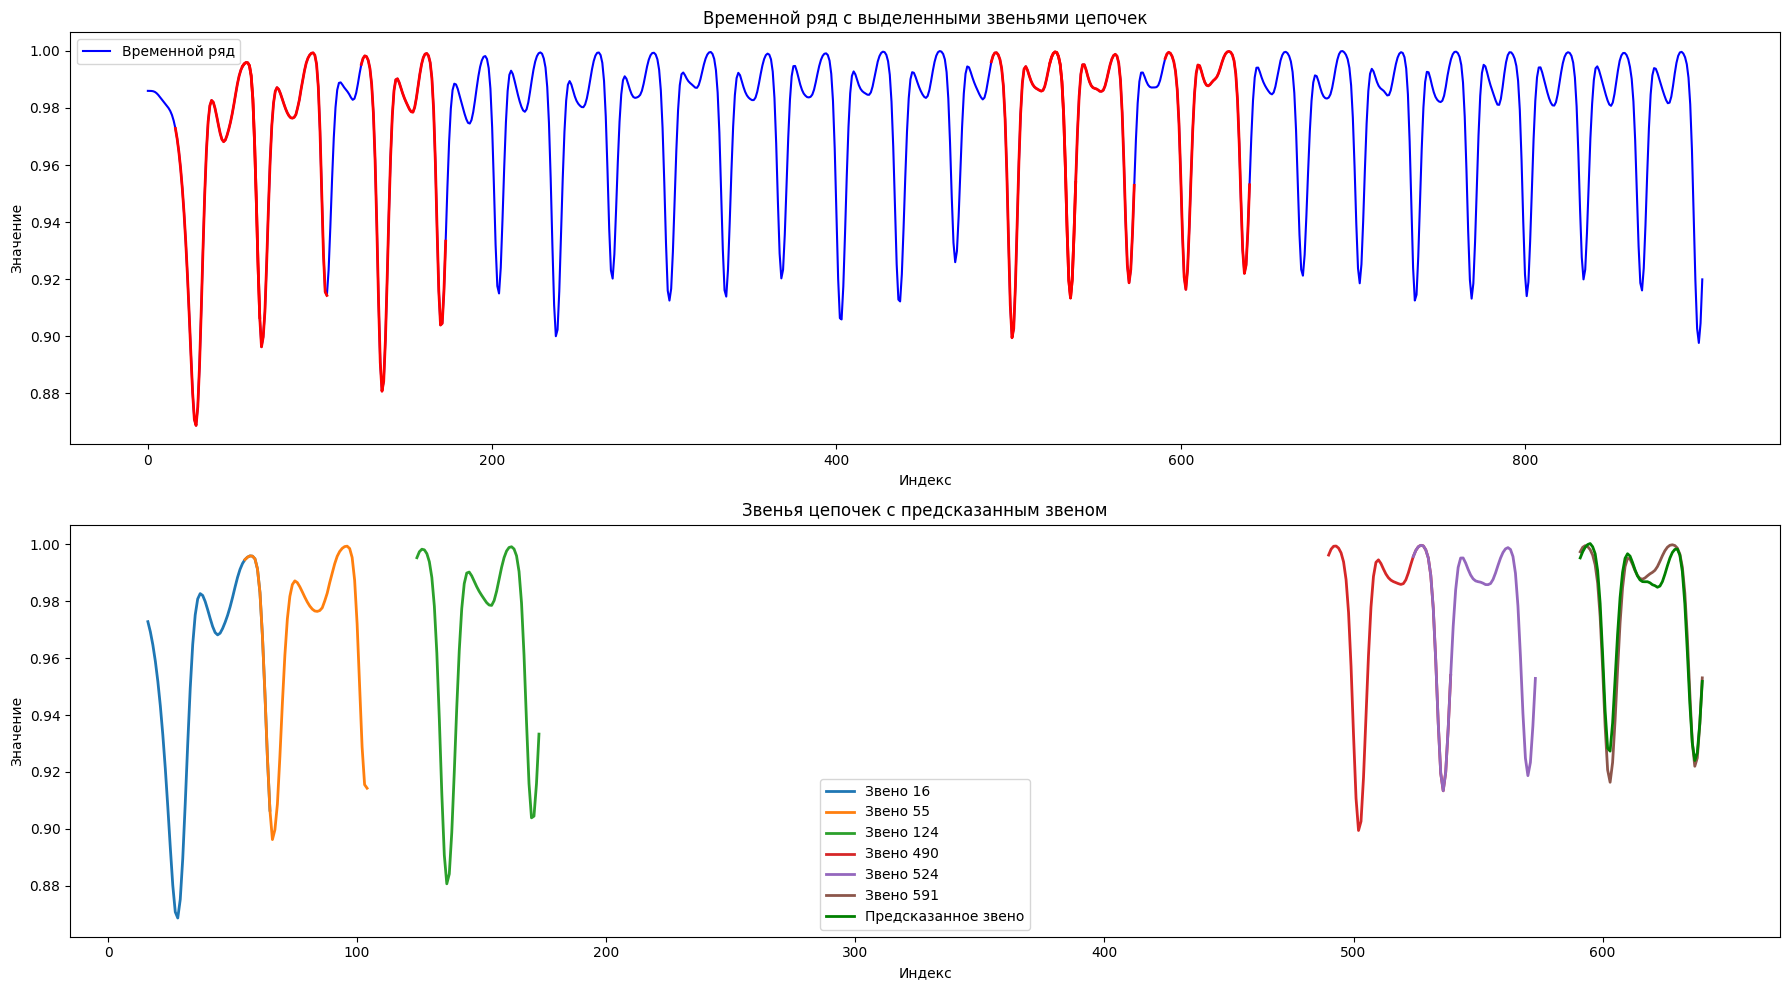

In [72]:
# Предсказание значения последнего звена
if len(longest_chain) >= 3:
    # Индексы двух последних звеньев
    idx1 = longest_chain[-3]
    idx2 = longest_chain[-2]
    idx3 = longest_chain[-1]

    # Значения двух последних звеньев
    chain1 = ts[idx1:idx1 + m]
    chain2 = ts[idx2:idx2 + m]
    chain3 = ts[idx3:idx3 + m]

    # Вычисление разности между двумя предыдущими звеньями
    diff = chain2 - chain1

    # Предсказание значения последнего звена
    predicted_chain3 = chain2 + diff

    # Сравнение предсказанного значения с истинным значением
    mse = mean_squared_error(chain3, predicted_chain3)
    print(f"Предсказанное значение последнего звена: {predicted_chain3}")
    print(f"Истинное значение последнего звена: {chain3}")
    print(f"Среднеквадратичная ошибка (MSE): {mse}")

    # Визуализация
    plt.figure(figsize=(18, 10))

    # График временного ряда с выделенными звеньями цепочек
    plt.subplot(2, 1, 1)
    plt.plot(ts, label='Временной ряд', color='blue')
    for idx in longest_chain:
        plt.plot(range(idx, idx + m), ts[idx:idx + m], color='red', linewidth=2)
    plt.title('Временной ряд с выделенными звеньями цепочек')
    plt.xlabel('Индекс')
    plt.ylabel('Значение')
    plt.legend()

    # График только звеньев цепочек
    plt.subplot(2, 1, 2)
    for idx in longest_chain:
        plt.plot(range(idx, idx + m), ts[idx:idx + m], label=f'Звено {idx}', linewidth=2)
    plt.plot(range(idx3, idx3 + m), predicted_chain3, label='Предсказанное звено', color='green', linewidth=2)
    plt.title('Звенья цепочек с предсказанным звеном')
    plt.xlabel('Индекс')
    plt.ylabel('Значение')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("Недостаточно звеньев в цепочке для предсказания.")

❓ Проанализируйте и изложите содержательный смысл полученных результатов.